22H1120016 - Trần Đăng Nam

Note: Run Lib và Load dữ liệu trước khi chạy 

Libraries: pip install scikit-learn numpy matplotlib seaborn

In [7]:
# load essential libraries
import pandas as pd #handle data csv, excel,...
from sklearn.datasets import load_iris

import numpy as np
from sklearn.model_selection import train_test_split #split train and test data

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns



🌸 Data Iris, substance is set of 5.1,3.5,1.4,0.2,Iris-setosa with 5 collumns and 150 rows.

Scikit-learn, divide 2 part
Data - hold numeric data
Target - hold label (then change to numeric class 0, 1, 2 respective to Iris-setosa, Iris-versicolor, Iris-virginica)

⚠️ Purpose: for standadize data in scikit-learn with input "features matrix (X)" và "target vector (y)".


In [10]:
#1. Nạp dữ liệu iris vào bộ nhớ và hiển thị thông tin về số thuộc tính (dimensionality), số objects (size).

iris = load_iris()
X = iris.data #numpy - 150x4 matrix (150,4) --> 150 samples, 4 features (columns)
Y = iris.target # load 150 labels "class" 0, 1, 2   


#Substance: X chỉ là 1 mảng numpy, không có tên cột => create dataframe with collumns 
df = pd.DataFrame(iris.data, columns=iris.feature_names) 
df['target'] = iris.target #add more column
df['target_name'] = iris.target_names[iris.target] 

pd.set_option('display.width', 1000)  # Tăng tăng độ rộng displace của jupyter
pd.set_option('display.max_columns', None)  # Hiển thị tất cả cột trên cùng một dòng
print(df.head(5)) 


print("Iris data: ")
#shape: return tuple  (row, column) 
print(X.shape)
print(f"Số objects (size): {X.shape[0]}")
print(f"Số thuộc tính (dimensionality): {X.shape[1]}")

print(X[0]) #first sample   


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target target_name
0                5.1               3.5                1.4               0.2       0      setosa
1                4.9               3.0                1.4               0.2       0      setosa
2                4.7               3.2                1.3               0.2       0      setosa
3                4.6               3.1                1.5               0.2       0      setosa
4                5.0               3.6                1.4               0.2       0      setosa
Iris data: 
(150, 4)
Số objects (size): 150
Số thuộc tính (dimensionality): 4
[5.1 3.5 1.4 0.2]


In [11]:
#2. Đặt nhãn (label) cho dữ liệu đã nạp và hiển thị số lớp (classes)

print(Y) #list targets, convert to number 
print(f"Class name (label names): {iris.target_names }")
print(f"Number of labels: {len(np.unique(iris.target))}") #number.target = number of targets name
print(f"Number of labels: {format(len(iris.target_names ))}")

print(f"Feature name (label names): { iris.feature_names  }")


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class name (label names): ['setosa' 'versicolor' 'virginica']
Number of labels: 3
Number of labels: 3
Feature name (label names): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Why we have to separate  X_train và Y_train (một tập chứa data và một tập chứa label) làm gì ?😕 

Supervised Learning Requirement: The DecisionTreeClassifier (and most supervised learning algorithms) needs both inputs (X_train) and outputs (Y_train) during training to  learn the mapping between features and labels.


3. Kích thước dữ liệu sau khi tách:
Training set: 105 samples
Test set: 45 samples


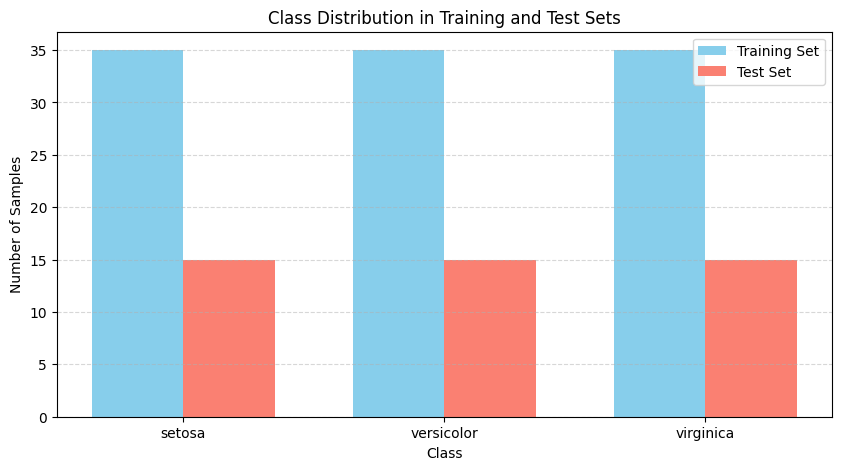

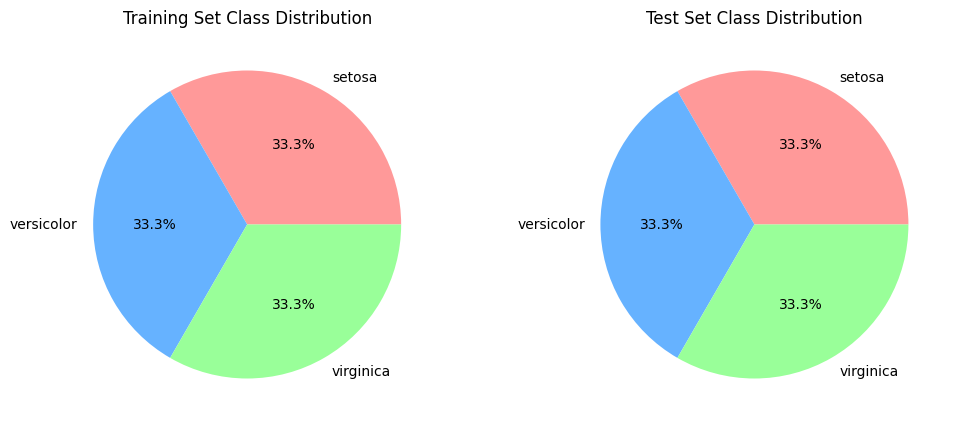

In [12]:
# 3. Tách dữ liệu thành hai phần: training data(70%) và test data (30%) -> ensure chia tập dataset đều (train và test có "độ khó" gần same)


#X = data 
#Y = target(label) - đã khai báo 
#context: có 3 label -> tập train 70% = 105 sample => stratify make sure lấy được 35 sample cho mỗi label (dataset có 150 row)
# Chia dữ liệu với stratify để đảm bảo tỷ lệ lớp cân bằng - train_test_split dùng để chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test).
# random_state = 0 -> tức mỗi lần chạy dữ liệu có thể sẽ bị random 
# stratify = Y -> đảm bảo tỷ lệ lớp cân bằng trong tập train và tập test (33.3% cho mỗi label)

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.3, 
                                                    train_size=0.7,
                                                    random_state=42, 
                                                    stratify = iris.target)

# X = data 
# Y = target (label)
# X_train = numpy array - has shape (105, 4) - 105 bởi vì chia 70%

print("\n3. Kích thước dữ liệu sau khi tách:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
# print (X_train.shape)
# print (X_train)



#Visualize the distribution training and testing
# 1. Bar Chart for Class Distribution
plt.figure(figsize=(10, 5))
train_counts = np.bincount(Y_train)
test_counts = np.bincount(Y_test)

x = np.arange(len(iris.target_names))  # [0, 1, 2] for 3 classes
width = 0.35  # Width of the bars

plt.bar(x - width/2, train_counts, width, label='Training Set', color='skyblue')
plt.bar(x + width/2, test_counts, width, label='Test Set', color='salmon')

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training and Test Sets')
plt.xticks(x,iris.target_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
# total = 150 samples -> train: 105 samples, test: 45 samples (test = each label 15 samples * 3)



# 2. Pie Charts for Proportional Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training set pie chart
ax1.pie(train_counts, labels = iris.target_names, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'])
ax1.set_title('Training Set Class Distribution')

# Test set pie chart
ax2.pie(test_counts, labels = iris.target_names, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'])
ax2.set_title('Test Set Class Distribution')

plt.show()


In the Iris dataset:

Features:
Sepal length (cm): ~4.3 to 7.9
Sepal width (cm): ~2.0 to 4.4
Petal length (cm): ~1.0 to 6.9
Petal width (cm): ~0.1 to 2.5
Variation: These features have different ranges and scales. For example, petal width (max 2.5) is much smaller than petal length (max 6.9).

Why Standardize?

Consistency: If you later use a scale-sensitive model (e.g., SVM, KNN) on the Iris data, standardized features ensure better performance.

Preprocessing Habit: It’s a standard practice in machine learning pipelines, making your code adaptable to other algorithms.

Numerical Stability: Ensures features are on a similar scale, which can help with convergence in some cases (though less critical for decision trees).

Raw X_train (first 5 rows):
[[5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 1.5]
 [5.1 3.8 1.5 0.3]
 [6.8 3.2 5.9 2.3]
 [5.7 2.8 4.1 1.3]]

Scaled X_train (first 5 rows):
[[-0.90045861 -1.22024754 -0.4419858  -0.13661044]
 [ 0.38036614 -1.87955796  0.40282929  0.38029394]
 [-0.90045861  1.63676428 -1.2868009  -1.17041921]
 [ 1.07899781  0.31814344  1.19132338  1.41410271]
 [-0.20182693 -0.56093712  0.17754527  0.12184175]]

Raw X_train - Mean of features: [5.87 3.06 3.78 1.21]
Raw X_train - Std of features: [0.86 0.46 1.78 0.77]
Scaled X_train - Mean of features: [ 0. -0. -0. -0.]
Scaled X_train - Std of features: [1. 1. 1. 1.]


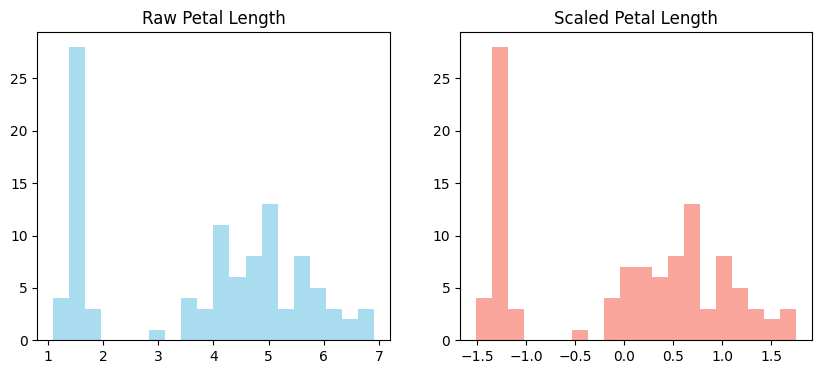

In [13]:
# 4. Chuẩn hóa dữ liệu với StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print first 5 rows before and after
print("Raw X_train (first 5 rows):")
print(X_train[:5])
print("\nScaled X_train (first 5 rows):")
print(X_train_scaled[:5])

# Compare means and stds
print("\nRaw X_train - Mean of features:", np.mean(X_train, axis=0).round(2))
print("Raw X_train - Std of features:", np.std(X_train, axis=0).round(2))
print("Scaled X_train - Mean of features:", np.mean(X_train_scaled, axis=0).round(2))
print("Scaled X_train - Std of features:", np.std(X_train_scaled, axis=0).round(2))

# Plot petal length (column 2) before and after
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(X_train[:, 2], bins=20, color='skyblue', alpha=0.7)
plt.title("Raw Petal Length") 
plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 2], bins=20, color='salmon', alpha=0.7)
plt.title("Scaled Petal Length")
plt.show()

In [25]:
# 5: Tạo và huấn luyện mô hình với training data ---
dt_classifier = DecisionTreeClassifier(max_depth = 2,random_state=42)  # Create model
dt_classifier.fit(X_train_scaled, Y_train)              # Train model

DecisionTreeClassifier(max_depth=2, random_state=42)


6. Đánh giá mô hình:
Ma trận nhầm lẫn (Confusion Matrix):
[[15  0  0]
 [ 0 12  3]
 [ 0  1 14]]
Độ chính xác (Accuracy): 0.91
F1-Score (weighted): 0.91


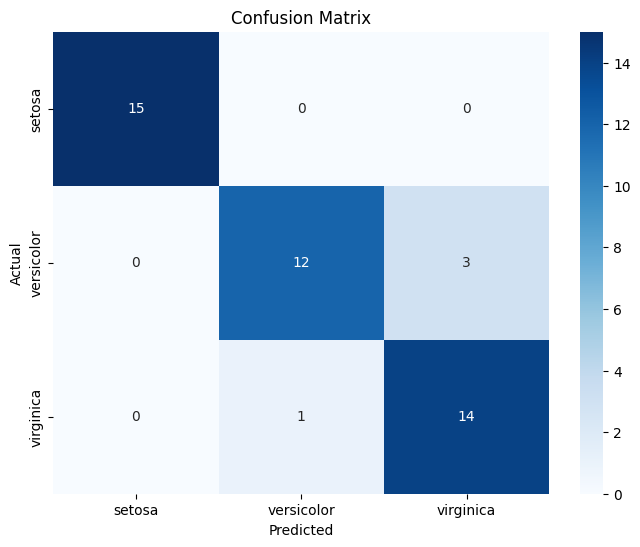

In [97]:
#  6: Test và đánh giá độ chính xác 
y_pred = dt_classifier.predict(X_test_scaled)  # Predict on test data

# Calculate metrics
conf_matrix = confusion_matrix(Y_test, y_pred)
acc_score = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')  # Weighted average for multi-class

print("\n6. Đánh giá mô hình:")
print("Ma trận nhầm lẫn (Confusion Matrix):")
print(conf_matrix)
print(f"Độ chính xác (Accuracy): {acc_score:.2f}")
print(f"F1-Score (weighted): {f1:.2f}")

# Visualize Confusion Matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

|--- feature_2 <= -0.75
|   |--- class: 0
|--- feature_2 >  -0.75
|   |--- feature_3 <= 0.44
|   |   |--- class: 1
|   |--- feature_3 >  0.44
|   |   |--- class: 2



[Text(0.4, 0.8333333333333334, 'petal length (cm) <= -0.752\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal width (cm) <= 0.445\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.105\nsamples = 36\nvalue = [0, 2, 34]\nclass = virginica')]

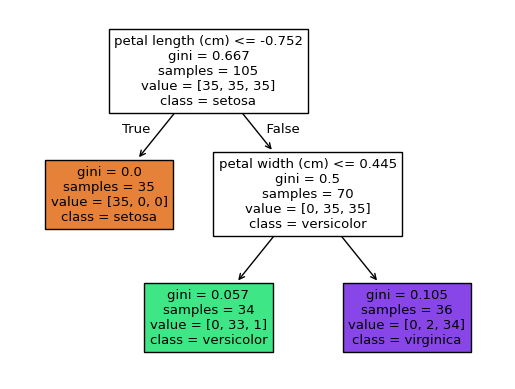

In [26]:
# 7: Trực quan hóa cây quyết định ---
from sklearn import tree
text_representation = tree.export_text(dt_classifier)
print(text_representation)

tree.plot_tree(dt_classifier,
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    filled = True)
